In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Dataset_LSTM.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,Text,Class
0,Ex Wife Threatening SuicideRecently I left my ...,depressed
1,Am I weird I don't get affected by compliments...,neutral
2,Finally 2020 is almost over... So I can never ...,neutral
3,i need helpjust help me im crying so hard,depressed
4,"I'm so lostHello, my name is Adam (16) and I'v...",suicide


In [4]:
# df = df.iloc[:900]
df.head()

,Text,Class
0,Ex Wife Threatening SuicideRecently I left my ...,depressed
1,Am I weird I don't get affected by compliments...,neutral
2,Finally 2020 is almost over... So I can never ...,neutral
3,i need helpjust help me im crying so hard,depressed
4,"I'm so lostHello, my name is Adam (16) and I'v...",suicide


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    748 non-null    object
 1   Class   748 non-null    object
dtypes: object(2)
memory usage: 11.8+ KB


In [6]:
df.Class.value_counts()

neutral      343
suicide      209
depressed    196
Name: Class, dtype: int64

In [7]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 8000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 150

# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8009 unique tokens.


In [8]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (748, 150)


In [9]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,  369,  757, 1188, 3714,
          1,  237,    7,  757,   17,   98,   47,   54,   81, 1189,   28,
          9,  564,    3, 1307,    2,    9,   21,   85,   11,    1,   18,
        565,    2, 2002,    2,   76,  113,    2,   64,   56,    8,    6,
        176,  184,  224,   54,  983, 1188,  121,    1,   18, 3715,  450,
        212, 3716,  176,  184,  282,   64,   40,    8,   10,    3,   54,
        914, 2554,   47,   54,  370,    2,  319,  142,  238,  113,    1,
         34,    6,  213,    8,   55,   71, 3717,   20,   12, 3718,    2,
         44,  145,  122,   16,   48,  464,   32,   54,   69,  261,   48,
         29,    1,   29,    3,   60,   49,    1,  588,    2,  589,   64,
        278,   28,    7, 1190,    1,  135,  126,    7,  757,   16,    1,
        491,  408,   23,  173, 1189,   28,  144,    3,  358,  146, 1656,
         13,  619,  186,  313,   26,    5,   58,   54,  261,   10,    3,
          1,  243,   21,   85,   10,  189,  421], d

In [10]:
Y = pd.get_dummies(df['Class']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (748, 3)


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(673, 150) (673, 3)
(75, 150) (75, 3)


In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
# model.add(tf.keras.layers.LSTM(10, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          800000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 150, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 880,703
Trainable params: 880,703
Non-trainable params: 0
_________________________________________________________________


2022-06-28 21:02:46.075747: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 21:02:46.075903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,validation_split=0.1,
                    verbose=1)

Epoch 1/5


2022-06-28 21:02:50.131388: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-28 21:02:51.062100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 1.0829 - accuracy: 0.4463 

2022-06-28 21:09:51.966202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 424s 42s/step - loss: 1.0829 - accuracy: 0.4463 - val_loss: 1.0506 - val_accuracy: 0.4559
Epoch 2/5
10/10 [==============================] - 415s 42s/step - loss: 0.9797 - accuracy: 0.4959 - val_loss: 1.0114 - val_accuracy: 0.5882
Epoch 3/5
10/10 [==============================] - 509s 52s/step - loss: 0.8983 - accuracy: 0.6364 - val_loss: 0.9113 - val_accuracy: 0.5735
Epoch 4/5
10/10 [==============================] - 1544s 167s/step - loss: 0.7623 - accuracy: 0.6694 - val_loss: 0.8943 - val_accuracy: 0.5588
Epoch 5/5
10/10 [==============================] - 424s 42s/step - loss: 0.6574 - accuracy: 0.6777 - val_loss: 0.7740 - val_accuracy: 0.6324


In [14]:
accr = model.evaluate(X_test,Y_test)
print('Test set/n  Loss: {:0.3f}/n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3/3 [==============================] - 3s 1s/step - loss: 0.7762 - accuracy: 0.6000
Test set/n  Loss: 0.776/n  Accuracy: 0.600


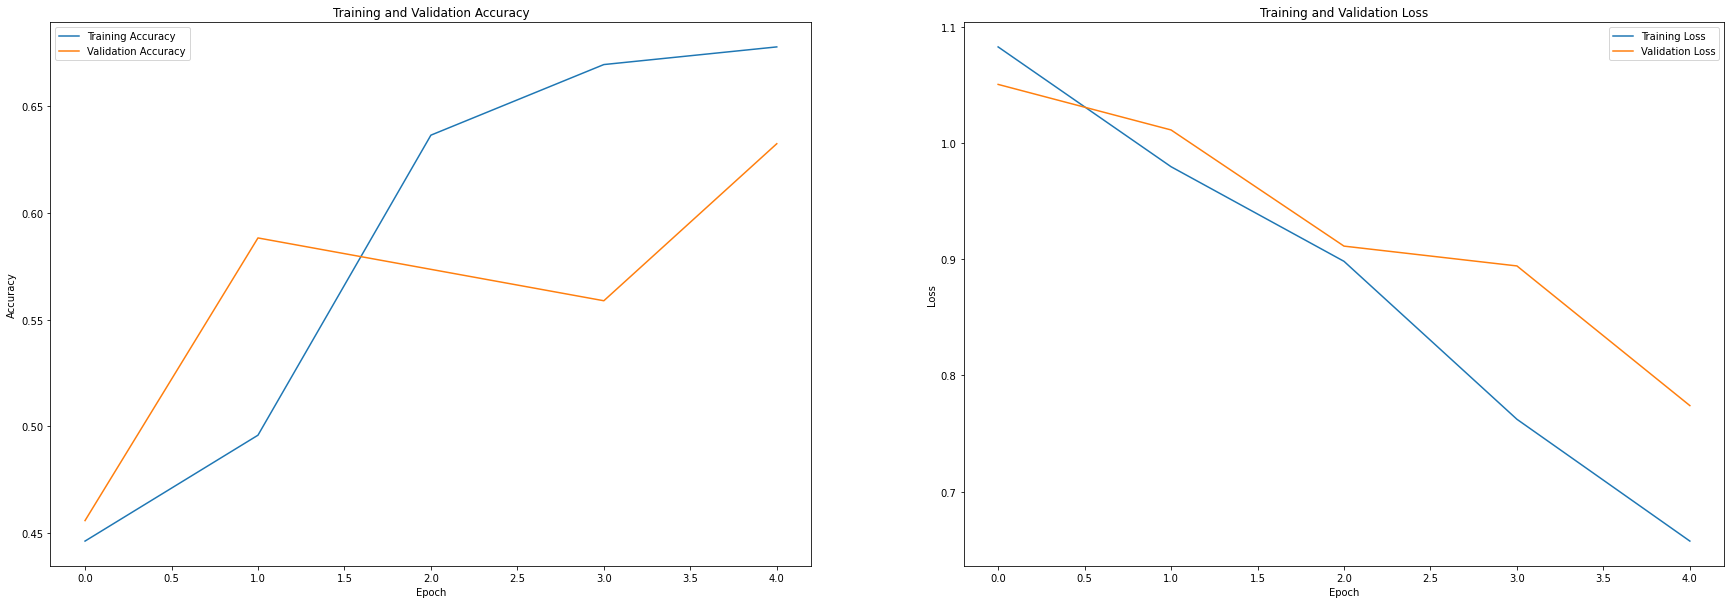

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']   #if you are usinf tf version 1.x then use 'acc' instead of 'accuracy'
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.subplots(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])

plt.show()

In [17]:
new_complaint = ['Iâ€™m trashLol I normally cringe at the self loathing posts here but honestly Iâ€™m such trash. Like literally everything about me. I just wish I could muster up the courage to just follow through. This is it and Iâ€™m okay with that that: everyday here is worst than the last. I appreciate this community for letting me know Iâ€™m not alone.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Neutral', 'Sucide', 'Depressed']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 1s 995ms/step
[[0.41246167 0.1495715  0.43796676]] Depressed


In [18]:
#saving vectorizer and model for later use
import pickle

with open('depression&suicide.pkl', 'wb') as fout:
    pickle.dump((tokenizer, model), fout)

INFO:tensorflow:Assets written to: ram://26c6c6e5-e9ff-48a7-934c-7c1160d462a3/assets


In [19]:
saved_model_path = 'trained-model/model_lstm.h5'
model.save(saved_model_path)